In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import geopandas
import contextily as cx
import matplotlib.pyplot as plt
import pickle
from shapely.geometry import Polygon
from utils import *
from region import Region
import shapely.geometry

In [3]:
plt.rcParams["figure.figsize"] = (20,15)
plt.rc('font', size=12)

In [3]:
file = "gadm404.gpkg"
states =geopandas.read_file(os.path.join("data", "map",file))
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
tk = states.loc[states["SOVEREIGN"]=="Turkey"]
eg = states.loc[states["SOVEREIGN"]=="Egypt"]
za = states.loc[states["SOVEREIGN"]=="South Africa"]

---
1. Turkey

In [6]:
file = os.path.join("house","Turkey.geojsonl") 
house =geopandas.read_file(file)
# house =geopandas.read_file(file).to_crs("EPSG:4326")

In [7]:
house.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

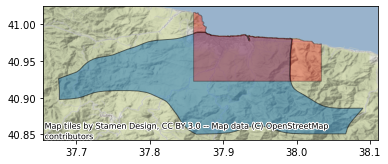

In [8]:
Ordu = Region(tk, [(41.02005066750512, 37.859763930345395),  (40.922495635935796, 38.03387755848272)], {"NAME_1":"Ordu", "NAME_2":"Merkez"})
ax= Ordu.city.plot(alpha=0.5, edgecolor='k')
ax= Ordu.region.plot(alpha=0.3, edgecolor='k', ax=ax, color="r")
cx.add_basemap(ax, crs="EPSG:4326")

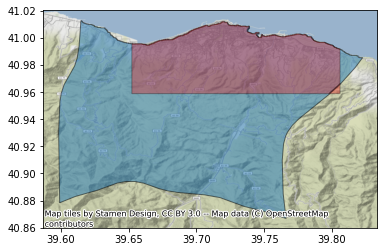

In [9]:
Trabzon = Region(tk, [(41.021005197945385, 39.65238569404653),  (40.95879910380294, 39.80587291303715)], {"NAME_1":"Trabzon", "NAME_2":"Merkez"})
ax= Trabzon.city.plot(alpha=0.5, edgecolor='k')
ax= Trabzon.region.plot(alpha=0.3, edgecolor='k', ax=ax, color="r")
cx.add_basemap(ax, crs="EPSG:4326")

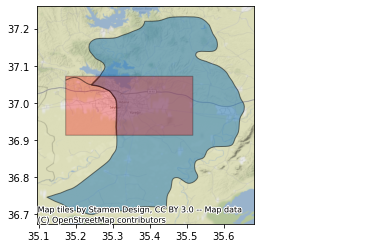

In [10]:
Adana = Region(tk, [(37.07143800485324, 35.17329182281017),  (36.91227725278698, 35.51638118905048)], {"NAME_1":"Adana", "NAME_2":"Yüreğir"})
ax= Adana.city.plot(alpha=0.5, edgecolor='k')
ax= Adana.region.plot(alpha=0.3, edgecolor='k', ax=ax, color="r")
cx.add_basemap(ax, crs="EPSG:4326")

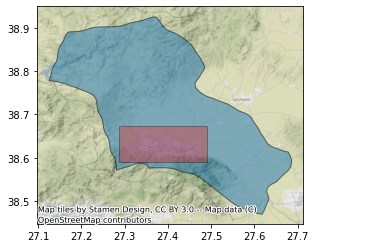

In [11]:
Manisa = Region(tk, [(38.67341901846549, 27.28799521554712),  (38.5893040428113, 27.491450649299416)], {"NAME_1":"Manisa", "NAME_2":"Merkez"})
ax= Manisa.city.plot(alpha=0.5, edgecolor='k')
ax= Manisa.region.plot(alpha=0.3, edgecolor='k', ax=ax, color="r")
cx.add_basemap(ax, crs="EPSG:4326")

In [12]:
Ordu.clip_house(house)
pickle.dump(Ordu, open(os.path.join("data","Ordu.pkl"),"wb"))

Trabzon.clip_house(house)
pickle.dump(Trabzon, open(os.path.join("data","Trabzon.pkl"),"wb"))

Adana.clip_house(house)
pickle.dump(Adana, open(os.path.join("data","Adana.pkl"),"wb"))

Manisa.clip_house(house)
pickle.dump(Manisa, open(os.path.join("data","Manisa.pkl"),"wb"))


0 87
100000 101
200000 113
300000 90
400000 103
500000 98
600000 100
700000 99
800000 100
900000 77
1000000 100
1100000 91
1200000 123
1300000 102
1400000 91
1500000 104
1600000 103
1700000 85
1800000 76
1900000 110
2000000 111
2100000 95
2200000 105
2300000 112
2400000 94
2500000 102
2600000 113
2700000 94
2800000 98
2900000 108
3000000 109
3100000 101
3200000 88
3300000 103
3400000 102
3500000 103
3600000 108
3700000 109
3800000 100
3900000 104
4000000 117
4100000 92
4200000 104
4300000 107
4400000 92
4500000 99
4600000 104
4700000 113
4800000 101
4900000 111
5000000 99
5100000 113
5200000 109
5300000 120
5400000 113
5500000 121
5600000 90
5700000 114
5800000 108
5900000 118
6000000 109
6100000 88
6200000 114
6300000 102
6400000 129
6500000 104
6600000 103
6700000 111
6800000 105
6900000 113
7000000 90
7100000 107
7200000 112
7300000 100
7400000 109
7500000 126
7600000 93
7700000 101
7800000 117
7900000 95
8000000 95
8100000 106
8200000 118
8300000 90
8400000 105
8500000 128
8600000 

In [13]:
Ordu = pickle.load(open(os.path.join("data","Ordu.pkl"),"rb"))
Trabzon = pickle.load(open(os.path.join("data","Trabzon.pkl"),"rb"))
Adana = pickle.load(open(os.path.join("data","Adana.pkl"),"rb"))
Manisa = pickle.load(open(os.path.join("data","Manisa.pkl"),"rb"))

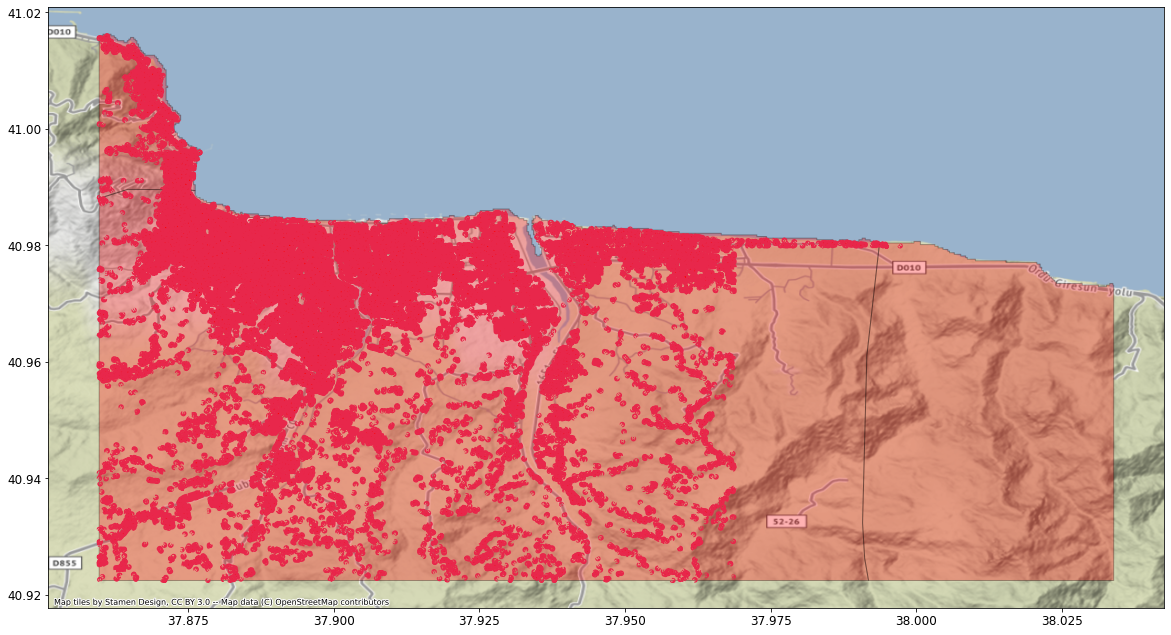

In [55]:
ax= Ordu.region.plot(alpha=0.3, edgecolor='k', color="r")
ax = Ordu.house.plot(ax=ax, color="r", edgecolor="#e8274b",  linewidth=5)
cx.add_basemap(ax,crs="EPSG:4326")

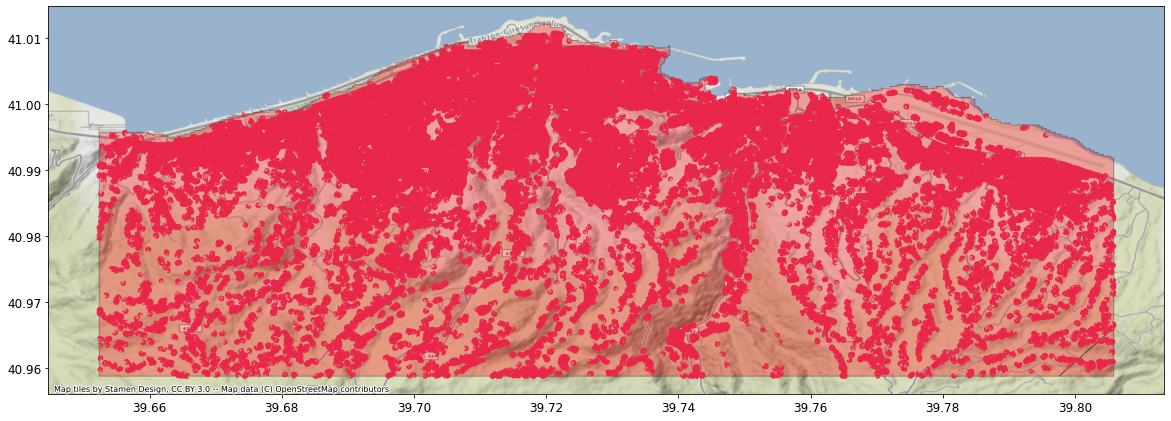

In [56]:
ax= Trabzon.region.plot(alpha=0.3, edgecolor='k', color="r")
ax = Trabzon.house.plot(ax=ax, color="r", edgecolor="#e8274b",  linewidth=5)
cx.add_basemap(ax,crs="EPSG:4326")

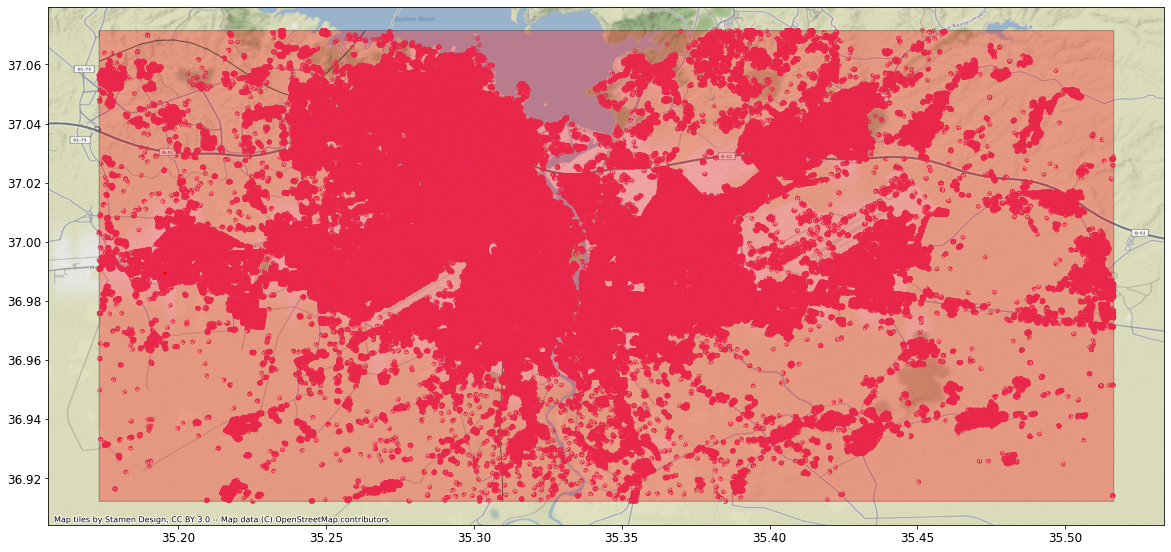

In [57]:
ax= Adana.region.plot(alpha=0.3, edgecolor='k', color="r")
ax = Adana.house.plot(ax=ax, color="r", edgecolor="#e8274b",  linewidth=5)
cx.add_basemap(ax,crs="EPSG:4326")

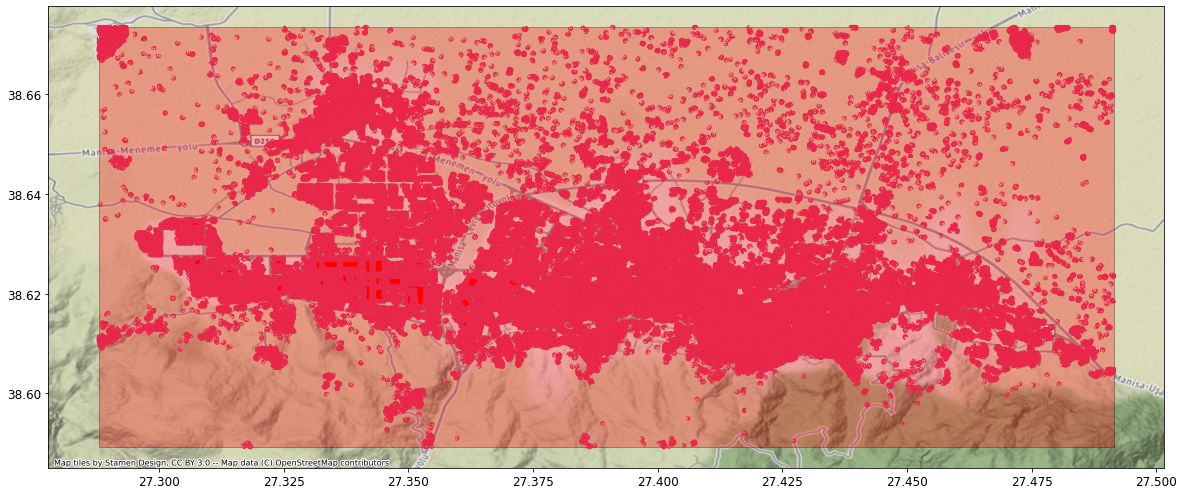

In [58]:
ax= Manisa.region.plot(alpha=0.3, edgecolor='k', color="r")
ax = Manisa.house.plot(ax=ax, color="r", edgecolor="#e8274b",  linewidth=5)
cx.add_basemap(ax,crs="EPSG:4326")

---
2. South Africa

In [5]:
file = os.path.join("house","South Africa.geojsonl") 
house_za =geopandas.read_file(file)
# house =geopandas.read_file(file).to_crs("EPSG:4326")

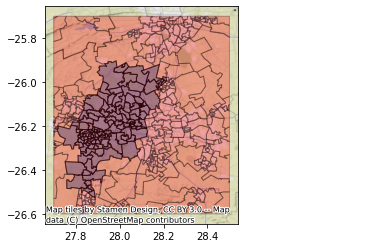

In [6]:
Johannesburg = Region(za, [(-25.7, 27.7),  (-26.6, 28.5)], {"NAME_2":"City of Johannesburg"})
ax= Johannesburg.city.plot(alpha=0.5, edgecolor='k')
ax= Johannesburg.region.plot(alpha=0.3, edgecolor='k', ax=ax, color="r")
cx.add_basemap(ax, crs="EPSG:4326")

In [7]:
Johannesburg.clip_house(house_za)
pickle.dump(Johannesburg, open(os.path.join("data","Johannesburg.pkl"),"wb"))

0 13872
100000 13986
200000 13659
300000 14080
400000 13902
500000 13822
600000 13964
700000 13554
800000 13979
900000 14129
1000000 13845
1100000 14026
1200000 13717
1300000 14133
1400000 13537
1500000 14136
1600000 13942
1700000 13935
1800000 13717
1900000 13885
2000000 14019
2100000 13622
2200000 14277
2300000 13676
2400000 14266
2500000 13904
2600000 13944
2700000 13612
2800000 14313
2900000 14172
3000000 13663
3100000 14094
3200000 13976
3300000 13640
3400000 14072
3500000 14183
3600000 13745
3700000 13873
3800000 13760
3900000 14085
4000000 13979
4100000 13418
4200000 13757
4300000 14004
4400000 14147
4500000 13923
4600000 14700
4700000 13347
4800000 14148
4900000 13784
5000000 13551
5100000 14169
5200000 13911
5300000 13715
5400000 14595
5500000 13181
5600000 14164
5700000 13795
5800000 13800
5900000 13917
6000000 13682
6100000 14228
6200000 14313
6300000 13624
6400000 13657
6500000 14080
6600000 13628
6700000 14043
6800000 13450
6900000 14038
7000000 13548
7100000 13841
7200000

In [11]:
Johannesburg = pickle.load(open(os.path.join("data","Johannesburg.pkl"),"rb"))

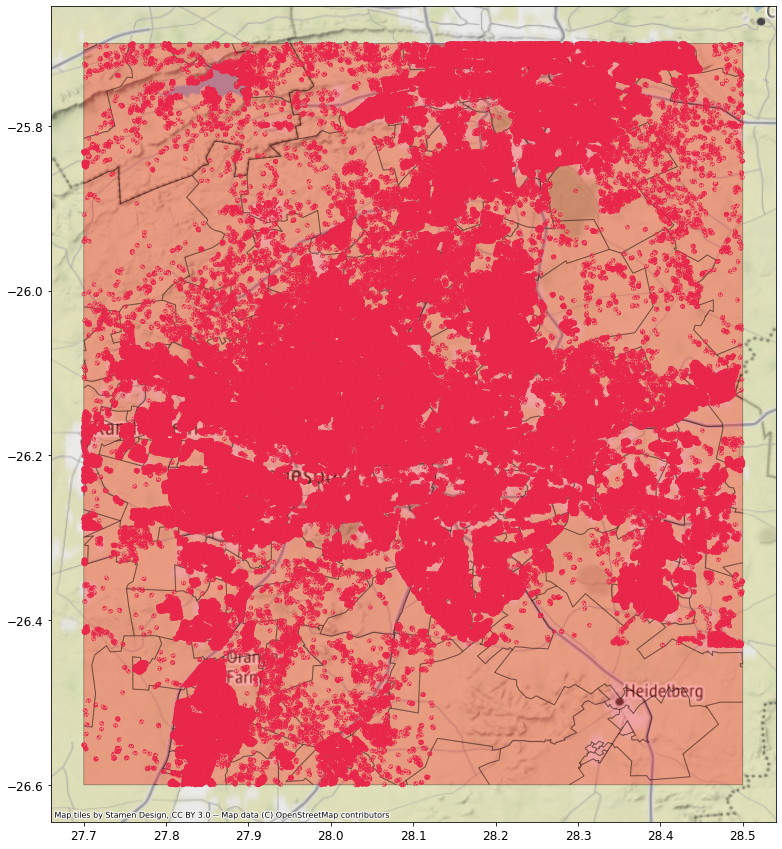

: 

In [15]:
ax= Johannesburg.region.plot(alpha=0.3, edgecolor='k', color="r")
ax = Johannesburg.house.sample(200000).plot(ax=ax, color="r", edgecolor="#e8274b",  linewidth=5)
cx.add_basemap(ax,crs="EPSG:4326")

---
3. Egypt

In [9]:
file = os.path.join("house","Egypt.geojsonl") 
house_eg =geopandas.read_file(file)
# house =geopandas.read_file(file).to_crs("EPSG:4326")

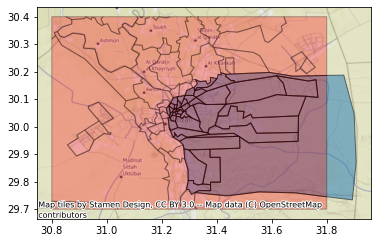

In [10]:
Cairo = Region(eg, [(30.4, 30.8),  (29.7, 31.8)], {"NAME_1":"Al Qahirah"})
ax= Cairo.city.plot(alpha=0.5, edgecolor='k')
ax= Cairo.region.plot(alpha=0.3, edgecolor='k', ax=ax, color="r")
cx.add_basemap(ax, crs="EPSG:4326")

In [11]:
Cairo.clip_house(house_eg)
pickle.dump(Cairo, open(os.path.join("data","Cairo.pkl"),"wb"))

0 16617
100000 16590
200000 16471
300000 16569
400000 16280
500000 16686
600000 16403
700000 16597
800000 16481
900000 16626
1000000 16517
1100000 16491
1200000 16492
1300000 16618
1400000 16475
1500000 16482
1600000 16600
1700000 16505
1800000 16720
1900000 16328
2000000 16526
2100000 16547
2200000 16604
2300000 16431
2400000 16263
2500000 16803
2600000 16579
2700000 16562
2800000 16489
2900000 16443
3000000 16445
3100000 16532
3200000 16514
3300000 16576
3400000 16653
3500000 16719
3600000 16489
3700000 16320
3800000 16548
3900000 16544
4000000 16506
4100000 16482
4200000 16416
4300000 16398
4400000 16457
4500000 16377
4600000 16388
4700000 16436
4800000 16498
4900000 16478
5000000 16458
5100000 16470
5200000 16506
5300000 16502
5400000 16419
5500000 16638
5600000 16337
5700000 16486
5800000 16672
5900000 16442
6000000 16582
6100000 16404
6200000 16562
6300000 16477
6400000 16500
6500000 16390
6600000 16576
6700000 16572
6800000 16195
6900000 16461
7000000 16371
7100000 16357
7200000

In [12]:
Cairo = pickle.load(open(os.path.join("data","Cairo.pkl"),"rb"))

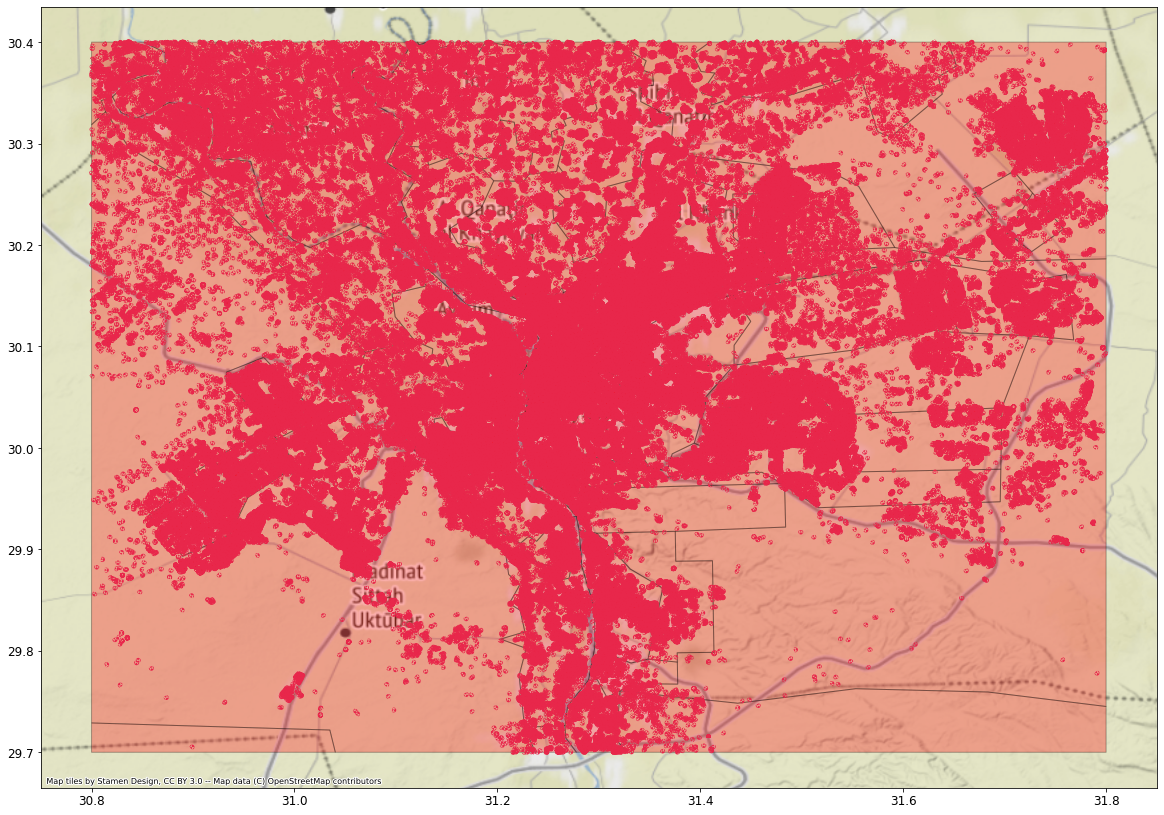

In [11]:
ax= Cairo.region.plot(alpha=0.3, edgecolor='k', color="r")
ax = Cairo.house.sample(200000).plot(ax=ax, color="r", edgecolor="#e8274b",  linewidth=5)
cx.add_basemap(ax,crs="EPSG:4326")